In [8]:
import nltk as nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
import re
import tkinter

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import treebank
from collections import Counter
from nltk.stem import PorterStemmer

In [64]:
dataframe = pd.read_csv(os.getcwd() + '/datasets/version_5.csv', sep='\ : ')
dataset = np.array(dataframe)

# remove 'Mark Otto, '
count = 0
stopword = stopwords.words('english')
stopword.append("0")
stopword.append("1")
stopword.append("2")
stopword.append("3")
stopword.append("Merge")
stopword.append("pull")
stopword.append("master")
stopword.append("twbs")
stopword.append("request")
stopword.append("branch")
stopword.append("com")
stopword.append("github")
stopword.append("bootstrap")

for row in dataset:
    dataset[count,0] = str(row[0]).replace('Mark Otto, ', '')
    count += 1

/home/devin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [65]:

def depunct(comments):    
    sentence = comments
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    sentences_without_punctuation = tokenizer.tokenize(sentence)
    return sentences_without_punctuation

def stemmer(word_list):
    porter = PorterStemmer()
    stemmed_words = []
    stemmed_file = open(os.getcwd() + "/artifacts/stemmed_words.txt", mode="a+", encoding="utf-8")
    
    for word in word_list:
        stemmed_word = porter.stem(word)
        stemmed_file.write(stemmed_word + "\n")
        stemmed_words.append(stemmed_word)
    
    stemmed_file.close()
    return stemmed_words


depunct_dataset = dataset
count = 0
total_comments = []

for row in dataset:
    depunct_comments = depunct(row[1])
    depunct_comments = [word for word in depunct_comments if word not in stopword ]
    total_comments += depunct_comments
    depunct_comments = ' '.join(depunct_comments)
    count += 1

stemmed_words = stemmer(total_comments)


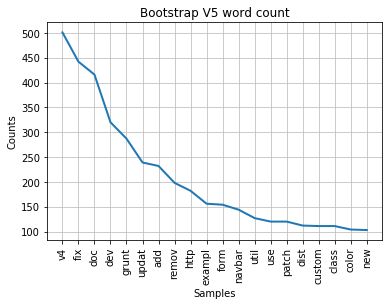

In [66]:

import seaborn as sns
import matplotlib.pyplot as plt

word_freq = nltk.FreqDist(stemmed_words)
word_freq.plot(20, title="Bootstrap V5 word count")

In [67]:
# word_freq_v2 = word_freq
# word_freq_v3 = word_freq
# word_freq_v4 = word_freq
# word_freq_v5 = word_freq

In [51]:
def plot_freqdist_freq(fd,
                       max_num=None,
                       cumulative=False,
                       title='Frequency plot',
                       linewidth=2):
    """
    As of NLTK version 3.2.1, FreqDist.plot() plots the counts
    and has no kwarg for normalising to frequency.
    Work this around here.

    INPUT:
        - the FreqDist object
        - max_num: if specified, only plot up to this number of items
          (they are already sorted descending by the FreqDist)
        - cumulative: bool (defaults to False)
        - title: the title to give the plot
        - linewidth: the width of line to use (defaults to 2)
    OUTPUT: plot the freq and return None.
    """

    tmp = fd.copy()
    norm = fd.N()
    for key in tmp.keys():
        tmp[key] = float(fd[key]) / norm

    if max_num:
        tmp.plot(max_num, cumulative=cumulative,
                 title=title, linewidth=linewidth)
    else:
        tmp.plot(cumulative=cumulative,
                 title=title,
                 linewidth=linewidth)

    return

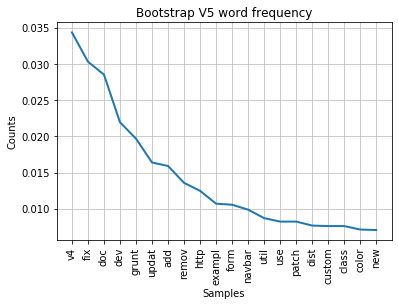

In [68]:
# source: https://martinapugliese.github.io/plotting-the-actual-frequencies-in-a-FreqDist-in-nltk/
# plot_freqdist_freq(fd=word_freq_v2, max_num=20, title="Bootstrap V2 word frequency")
# plot_freqdist_freq(fd=word_freq_v3, max_num=20, title="Bootstrap V3 word frequency")
# plot_freqdist_freq(fd=word_freq_v4, max_num=20, title="Bootstrap V4 word frequency")
plot_freqdist_freq(fd=word_freq_v5, max_num=20, title="Bootstrap V5 word frequency")


In [140]:
text_cloud = "version_4.txt"
text_cloud_image = "version_4.png"

np.savetxt(os.getcwd()+'/artifacts/' + text_cloud, total_comments, delimiter=",", fmt='%s')

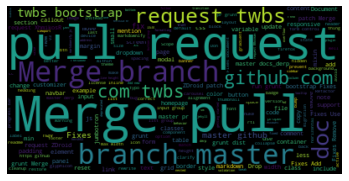

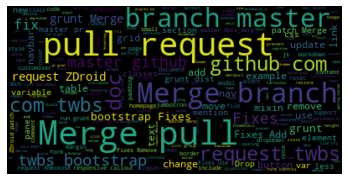

In [142]:

from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, os.getcwd() + '/artifacts/' + text_cloud)).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)
# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file(path.join(d, os.getcwd()+ "/artifacts/" + text_cloud_image))